In [1]:
from numpy import *
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Pricing a European option using Black-Scholes formula and Monte Carlo simulations 
# Pricing a Barrier option using Monte Carlo simulations

S0 = 100     # spot price of the underlying stock today
K = 105      # strike at expiry
mu = 0.05    # expected return
sigma = 0.2  # volatility
r = 0.05     # risk-free rate
T = 1.0      # years to expiry
Sb = 110     # barrier

# Complete the following functions

def BS_european_price(S0, K, T, r, sigma):
    t = 0
    d1 = (log(S0/K) + (r+sigma**2/2) * (T-t)) / (sigma*np.sqrt(T-t))
    d2 = d1 - sigma * np.sqrt(T-t)

    c = norm.cdf(d1)*S0 - norm.cdf(d2)*K*np.exp(-r*(T-t))
    p = norm.cdf(-d2)*K*np.exp(-r*(T-t)) - norm.cdf(-d1)*S0
      
    return c, p

def MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths):
   
    paths = np.zeros((numSteps + 1, numPaths))
    
    # dT is the time increment (in years)
    dT = T / numSteps
        
    # Vector of paths will store realizations of the asset price
    # First asset price is the initial price
    paths[0] = [S0] * numPaths
 
    # Generate paths
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                               + sigma * np.sqrt(dT) * np.random.normal(0,1))
    
    # Calculate the payoff for each path for Call & Put 
    CallPayoffT = np.maximum(paths[numSteps] - K, 0)
    PutPayoffT = np.maximum(K - paths[numSteps], 0)

    # Discount back
    c  = np.mean(CallPayoffT) * np.exp(-r * T)
    p = np.mean(PutPayoffT) * np.exp(-r * T)
 
    return c, p

def MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
 
    paths = np.zeros((numSteps + 1, numPaths))
    
    # dT is the time increment (in years)
    dT = T / numSteps
        
    # Vector of paths will store realizations of the asset price
    # First asset price is the initial price
    paths[0] = [S0] * numPaths
 
    # Generate paths
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                               + sigma * np.sqrt(dT) * np.random.normal(0,1))
 
    # Calculate the payoff for each path for Call & Put 
    CallPayoffT = np.maximum(paths[numSteps] - K, 0)
    PutPayoffT = np.maximum(K - paths[numSteps], 0)
    
    # The option becomes a standard option if the barrier was crossed some time before expiration, o/w payoff is zero
    a = sum(paths>=Sb,axis=0)
    
    for iPath in range(numPaths):
        # If the barrier was not reached, change payoff to zero
        if a[iPath] == 0:
            CallPayoffT[iPath] = 0
            PutPayoffT[iPath] = 0
     
    # Discount back
    c  = np.mean(CallPayoffT) * np.exp(-r * T)
    p = np.mean(PutPayoffT) * np.exp(-r * T)

    return c, p 

In [17]:
# Define variable numSteps to be the number of steps for multi-step MC
# numPaths - number of sample paths used in simulations

numSteps = 252
numPaths = 1000000

# Implement your Black-Scholes pricing formula
call_BS_European_Price, putBS_European_Price = BS_european_price(S0, K, T, r, sigma)

# Implement your one-step Monte Carlo pricing procedure for European option
callMC_European_Price_1_step, putMC_European_Price_1_step = MC_european_price(S0, K, T, r, mu, sigma, 1, numPaths)

# Implement your multi-step Monte Carlo pricing procedure for European option
callMC_European_Price_multi_step, putMC_European_Price_multi_step = MC_european_price(S0, K, T, r, mu, sigma, numSteps, numPaths)
 
# Implement your one-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_1_step, putMC_Barrier_Knockin_Price_1_step =  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, 1, numPaths)
 
# # Implement your multi-step Monte Carlo pricing procedure for Barrier option
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step =  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma, numSteps, numPaths)
 

print('Black-Scholes price of an European call option is ' + str(call_BS_European_Price))
print('Black-Scholes price of an European put option is ' + str(putBS_European_Price))
print('One-step MC price of an European call option is ' + str(callMC_European_Price_1_step)) 
print('One-step MC price of an European put option is ' + str(putMC_European_Price_1_step)) 
print('Multi-step MC price of an European call option is ' + str(callMC_European_Price_multi_step)) 
print('Multi-step MC price of an European put option is ' + str(putMC_European_Price_multi_step)) 
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step)) 
print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))

Black-Scholes price of an European call option is 8.021352235143176
Black-Scholes price of an European put option is 7.9004418077181455
One-step MC price of an European call option is 8.015212933670396
One-step MC price of an European put option is 7.889813108168575
Multi-step MC price of an European call option is 8.00196059121057
Multi-step MC price of an European put option is 7.915066262365608
One-step MC price of an Barrier call option is 7.81502543181406
One-step MC price of an Barrier put option is 0.0
Multi-step MC price of an Barrier call option is 8.000693483498955
Multi-step MC price of an Barrier put option is 2.0157995036943803


Plot one chart in Python that illustrates your Monte Carlo pricing procedure in the best way.

In [22]:
# Plot one chart illustrates Monte Carlo pricing procedure in the best way

def plot_MC (S0, Sb, K, T, r, mu, sigma, numSteps, numPaths):
   
    paths = np.zeros((numSteps + 1, numPaths))
    
    # dT is the time increment (in years)
    dT = T / numSteps
        
    # Vector of paths will store realizations of the asset price
    # First asset price is the initial price
    paths[0] = [S0] * numPaths
 
    # Generate paths
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                               + sigma * np.sqrt(dT) * np.random.normal(0,1))
    
    # Plot paths
    [plt.plot(paths[:,i], linewidth=2, color='black') for i in range(numPaths)]
    # plot horizontal line of barrier
    plt.plot([Sb]*numSteps)
    plt.title('Monte Carlo pricing procedure')
    plt.xlabel('Time')
    plt.ylabel('Price of underlying')
    
    return paths 

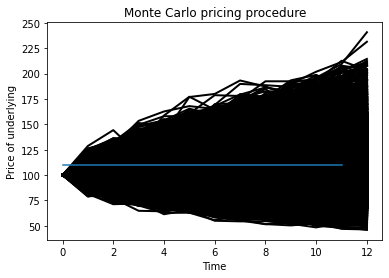

In [25]:
plot = plot_MC (S0, Sb, K, T, r, mu, sigma, 12, 50000)

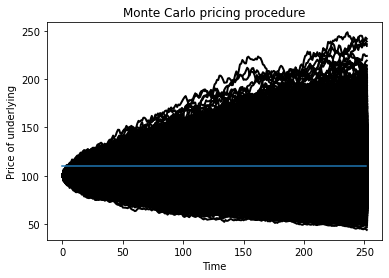

In [23]:
plot = plot_MC (S0, Sb, K, T, r, mu, sigma, 252, 50000)

Compute prices of Barrier options with volatility increased and decreased by 10% from the original inputs. 

In [34]:
# volatility decreased by 10% from the original inputs
callMC_Barrier_Knockin_Price_1_step , putMC_Barrier_Knockin_Price_1_step =  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, 1, numPaths)
print('one-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('one-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step))  

one-step MC price of an Barrier call option is 6.9916279108354935
one-step MC price of an Barrier put option is 0.0


In [35]:
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step =  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*0.9, 252, numPaths)

print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))  

Multi-step MC price of an Barrier call option is 7.197503817050976
Multi-step MC price of an Barrier put option is 1.5604494191326796


In [31]:
# volatility increased by 10% from the original inputs
callMC_Barrier_Knockin_Price_1_step , putMC_Barrier_Knockin_Price_1_step =  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, 1, numPaths)
print('One-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_1_step)) 
print('One-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_1_step))  

One-step MC price of an Barrier call option is 8.604730157916816
One-step MC price of an Barrier put option is 0.0


In [36]:
callMC_Barrier_Knockin_Price_multi_step, putMC_Barrier_Knockin_Price_multi_step =  MC_barrier_knockin_price(S0, Sb, K, T, r, mu, sigma*1.1, 252, numPaths)

print('Multi-step MC price of an Barrier call option is ' + str(callMC_Barrier_Knockin_Price_multi_step)) 
print('Multi-step MC price of an Barrier put option is ' + str(putMC_Barrier_Knockin_Price_multi_step))  

Multi-step MC price of an Barrier call option is 8.78356903503993
Multi-step MC price of an Barrier put option is 2.5056455337024315


Design your own procedure for choosing a number of time steps and a number of scenarios in Monte Carlo pricing for European option to get the same price (up to the cent) as given by the Black-Scholes formula.

In [59]:
numSteps_list = [1, 2, 12, 24, 252]

c1_list = []
p1_list = []

for i in numSteps_list:
    c, p = MC_european_price(S0, K, T, r, mu, sigma, i, 100000)
    c1_list.append(c)
    p1_list.append(p)   

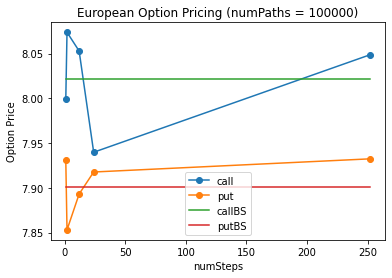

In [60]:
plt.plot(numSteps_list, c1_list, '-o', label='call')
plt.plot(numSteps_list, p1_list, '-o', label='put')

plt.plot(numSteps_list, [call_BS_European_Price]* len(numSteps_list), label='callBS')
plt.plot(numSteps_list, [putBS_European_Price]* len(numSteps_list), label='putBS')

plt.title('European Option Pricing (numPaths = 100000)')
plt.xlabel('numSteps')
plt.ylabel('Option Price')
plt.legend()
plt.show()

In [96]:
# Monte Carlo pricing for European call option
for i in np.arange(12,24):
    c,_ = MC_european_price(S0, K, T, r, mu, sigma, i, 100000)
    if c.round(2) == call_BS_European_Price.round(2):
      print ('When numSterps =', i)
      print ('MC pricing for European call = ', c.round(2))
      print ('Black-Scholes price of an European call option = ', call_BS_European_Price.round(2))
      break

When numSterps = 12
MC pricing for European call =  8.02
Black-Scholes price of an European call option =  8.02


In [97]:
# Monte Carlo pricing for European put option
for i in np.arange(12,24):
    _,p = MC_european_price(S0, K, T, r, mu, sigma, i, 100000)
    if p.round(2) == putBS_European_Price.round(2):
      print ('When numSterps =', i)
      print ('MC pricing for European put = ', p.round(2))
      print ('Black-Scholes price of an European put option = ', putBS_European_Price.round(2))
      break

When numSterps = 19
MC pricing for European put =  7.9
Black-Scholes price of an European put option =  7.9
